# SQLite Database to Matplotlib graph

Now that the data from the AutoSleep app has been extracted, transformed, and loaded onto an SQLite databse, it is also possible to pull information from the database and analyse the data.

In [2]:
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd

In [3]:
# creating a connection to SQL database
connection = sqlite3.connect('etl_autosleep.db')
cursor = connection.cursor()

sql = """
SELECT date, sleep_efficiency, oxygen_saturation_average FROM autosleep_2022 
"""

# creating a df with the data from SQL database
df = pd.read_sql(sql, connection)

# changing column types to float or datetime
df[['sleep_efficiency', 'oxygen_saturation_average']] = df[['sleep_efficiency', 'oxygen_saturation_average']].astype(float)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df.dtypes

date                         datetime64[ns]
sleep_efficiency                    float64
oxygen_saturation_average           float64
dtype: object

## Plotting Graphs

The first graph is for the sleep efficiency and oxygen saturation average, and seeing how it has done over the past year.

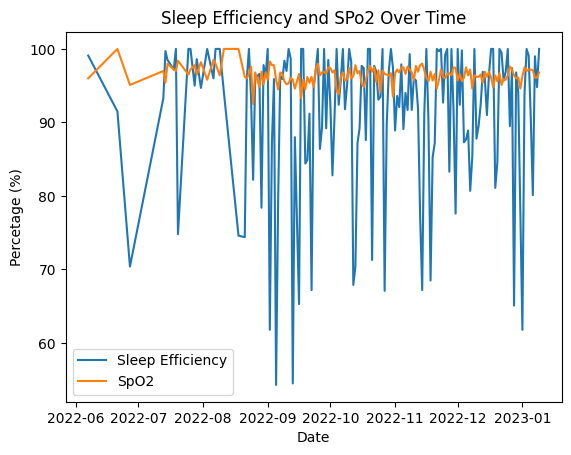

In [4]:
plt.plot(df['date'], df['sleep_efficiency'], '-', label='Sleep Efficiency')
plt.plot(df['date'], df['oxygen_saturation_average'], '-', label='SpO2')

plt.title('Sleep Efficiency and SPo2 Over Time')
plt.xlabel('Date')
plt.ylabel('Percetage (%)')
plt.legend()

plt.show()